***
***

# **COVID-19 Vaccination Progress**

## *5) Visualisations for In-Depth Data Analysis (2)*

***
***

## Table of Contents

| 1. INTRODUCTION | 2. Visualisations | 3. SUMMARY |
|----|----|----|
| *1.1 Dataset Characteristics* | *2.1 Importing Libraries and Data* | 3.1 Key Findings |
| | *2.2 In-Depth Analysis* | |

***
***

## 1. INTRODUCTION

In this notebook we use the cleaned/ feature-engineered dataset generated in notebook 1 (Initial Data Exploration, Cleaning and Feature Engineering) for an in-depth analysis. The focus of this notebook will be on temporal chracteristics, as well as newly engineered features, such as 'partially vaccinated people'.

***

### 1.1 Dataset Characteristics

1) Our PROCESSED dataframe contains the following:

| FEATURE | description | comment |
|----|----|----|
| **date** | data entry (13th December 2020 to 24th March 2021) | - |
| **weekday** | day of week (e.g. Monday) | NEW column added during feature engineering |
| **country** | 147 countries | 4 duplicates removed, UN recognises 197 countries (193 are members) |
| **country_grouped** | 17 countries/groups | NEW column added during feature engineering |
| **4 x vaccine type columns** | inactivated_virus, recombinant, rna, protein | NEW columns added during feature engineering |
| **10 x vaccine columns** | name/company | NEW columns added during cleaning to replace vaccines column |
| **daily_vaccinations** | no. of vaccination for that date/country | some days only daily vaccinations, some days only the (cummulative) total |
| **daily_vaccinations_per_million** | ratio (in ppm) between vaccination number and total population for the current date in the country | - |
| **daily_vaccinations_per_hundred** | ratio (in percent) between vaccination number and total population for the current date in the country | NEW column added during feature engineering |
| **daily_vaccinations_raw** | daily vaccinations as CHANGE COMPARED TO PREVIOUS DAY (mainly cross-check purposes) | calculation: total_vaccinations (day) - total_vaccination (previous day) |
| **total_vaccinations** | absolute number of immunisations (jabs) in the country | some days only daily vaccinations, some days only the (cummulative) total |
| **total_vaccinations_per_hundred** | ratio (in percent) between vaccination number and total population up to the date in the country | - |
| **people_vaccinated** | total no. of people with immunisation (partial and full) | - |
| **people_vaccinated_per_hundred** | ratio (in percent) between population immunized (partial and full) and total population | - |
| **people_fully_vaccinated** | total no. of people with full immunisation (typically 2) | - |
| **people_fully_vaccinated_per_hundred** | ratio (in percent) between population fully immunized and total population | - |
| **people_partially_vaccinated** | total no. of people with partial immunisation (i.e. 1 jab) | NEW column added during feature engineering |
| **people_partially_vaccinated_per_hundred** | ratio (in percent) between population partially immunized and total population | NEW column added during feature engineering |

***
***

## 2. IMPORTS AND DATA PREPARATION

***

### 2.1 Importing Libraries and Data

+ Import numpy (linear algebra), pandas (data processing) and visualisation libraries (matplotlib, seaborn, plotly).
+ Import original and processed (notebook 1) dataset on COVID-19 vaccination progress.

In [1]:
#Import basic libraries
import numpy as np
import pandas as pd

#Libraries for visualisation
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.dates as mdates
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

#Suppress pandas future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Plot settings
%matplotlib inline
dpi_var=150

#from IPython.display import Image

In [2]:
#Import original and processed (notebook 1) datasets
#Import local Kaggle dataset (version 81, March 2021) country_vaccinations on COVID-19 vaccination progress and set date to datetime
df = pd.read_csv('data/country_vaccinations.csv', parse_dates=['date'])

#Alternatively load updated Kaggle dataset country_vaccinations on COVID-19 vaccination progress from url
#df = pd.read_csv('https://www.kaggle.com/gpreda/covid-world-vaccination-progress/download', parse_dates=['date'])

#Import processed dataframe from notebook 1
df_processed = pd.read_csv('data/df_processed.csv', parse_dates=['date'])

#Generate 2 additional dataframes with date as index
df_date = df.set_index('date')
df_processed_date = df_processed.set_index('date')

***

### 2.2 In-Depth Analysis

In this section an in-depth analysis of the data was carried out:

+ Relative usage of vaccines & vaccine types (globally and region-wise)
+ People vaccinated per country over time
+ Daily vaccinations vs raw

**TASK 1**:

Pie chart of relative usage of vaccines (incl. types) and stacked bar charts reflecting relative usage of vaccines (and vaccine types) per region (country). To achieve this the count was used for the vaccines, i.e. total for each day and every country over the entire time-span. 

NOTE 1: Since the data only pertains information regarding the vaccines used by a specific country on a specific days, but does not include actual numbers regarding the doses, the plots can only be used as a rough guidance for estimating the usage of the different vaccines.

**KEY FINDINGS**:

The pie chart clearly shows that currently 4 recombinant viral vector based vaccines and 2 messenger RNA based vaccines are being used worldwide represented by about 40% of observations over the time-span covered being allocated to these types of vaccines. The BioNtech (mRNA) and AstraZeneca (recombinant) vaccines have the highest frequency of observations associated with them. This is followed by Modera (mRNA) and finally JnJ, Sinovac and Sputnik, 3 recombinant vaccines that are not used in many countries and thus have fewer no. of observations associated with them. This trend does not significantly change over time (1st line plot), albeit that recombinant vaccine types have gained more usage recently, most likely due to more recombinant vaccines becoming available. In addition, there are 3 inactivated virus based vaccines (Covaxin, 2 x Sinopharm) and 1 protein subunit based vaccine (EpiVacCorona) which are only used in certain parts of the world and hence show fewer dates/countries associated with them. The 2nd line plot also confirms that the trend over time stays constant with respect to the relative usage of each vaccine.

The 2 stacked bar charts show the relative frequencies of the different vaccines and vaccine types per country. It can clearly be seen that the only protein based vaccines EpiVAcCorona is currently only used in Russia. It is also noteworthy that Israel and Japan only used mRNA based vaccines. And, India does currently not use mRNA based vaccines. In Germany we use recombinant and mRNA based vaccines. If we take a closer look into the individual vaccines we note that Israel uses the two mRNA based vaccines Moderna and BioNtech, wheres India uses AstraZeneca (recombinant) and Covaxin (inactivated virus) and Japan only uses BioNtech. It is noteworthy that Russia uses its' own vaccines, Sputnik and EpiVacCorona, and China use their vaccines Sinopharm (x2) and Sinovac. In Germany we use Moderna, BioNtech and AstraZeneca.

In [3]:
#No. of entries per vaccine type on 13th December 2020 (first day)
print(f'CHECK: The no. of entries for the different types of vaccines on the first day (13th DEC 2020) were: \n')
df_processed_date[['inactivated_virus', 'recombinant', 'rna', 'protein']].loc['2020-12-13'].sum()

CHECK: The no. of entries for the different types of vaccines on the first day (13th DEC 2020) were: 



inactivated_virus    0
recombinant          1
rna                  1
protein              0
dtype: int64

In [4]:
#No. of entries per vaccine type on 24th March 2021 (last day)
print(f'CHECK: The no. of entries for the different types of vaccines on the last day (24th MAR 2021) were: \n')
df_processed_date[['inactivated_virus', 'recombinant', 'rna', 'protein']].loc['2021-03-24'].sum()

CHECK: The no. of entries for the different types of vaccines on the last day (24th MAR 2021) were: 



inactivated_virus    12
recombinant          47
rna                  38
protein               0
dtype: int64

In [5]:
#Create new dataframe for plotting vaccines and vaccine types per country
#Create new dataframe with relevant columns
lst_sub = ['covaxin', 'epivaccorona', 'johnson_johnson', 'moderna',
           'oxford_astrazeneca', 'pfizer_biontech', 'sinopharm_beijing',
           'sinopharm_wuhan', 'sinovac', 'sputnik_v', 'inactivated_virus',
           'recombinant', 'rna', 'protein', 'country_grouped'] 
df_filt_1 = df_processed[lst_sub]
df_filt_2 = df_filt_1.copy()

#Add new column with count of observations per country
df_filt_2['freq'] = df_filt_2.loc[:, ('country_grouped')].map(df_filt_2['country_grouped'].value_counts())

#Get sum of vaccines per day and carry over count
df_filt_2 = df_filt_2.groupby('country_grouped').agg({'covaxin': 'sum', 'epivaccorona': 'sum', 'johnson_johnson': 'sum', 'moderna': 'sum',
                                                      'oxford_astrazeneca': 'sum', 'pfizer_biontech': 'sum', 'sinopharm_beijing': 'sum',
                                                      'sinopharm_wuhan': 'sum', 'sinovac': 'sum', 'sputnik_v': 'sum', 'inactivated_virus': 'sum',
                                                      'recombinant': 'sum', 'rna': 'sum', 'protein': 'sum', 'freq': 'mean'})

#For each vaccine calculate no. of observations per country (in %)
l = ['covaxin', 'epivaccorona', 'johnson_johnson', 'moderna',
     'oxford_astrazeneca', 'pfizer_biontech', 'sinopharm_beijing',
     'sinopharm_wuhan', 'sinovac', 'sputnik_v', 'inactivated_virus',
     'recombinant', 'rna', 'protein']

for i in l:
    df_filt_2[i] = df_filt_2[i] / df_filt_2['freq'] * 100

#Filter dataframe to relevant columns, i.e. vaccines
df_filt_3 = df_filt_2[['covaxin', 'epivaccorona', 'johnson_johnson', 'moderna',
                       'oxford_astrazeneca', 'pfizer_biontech', 'sinopharm_beijing',
                       'sinopharm_wuhan', 'sinovac', 'sputnik_v']]

#Filter dataframe to relevant columns, i.e. vaccine types
df_filt_4 = df_filt_2[['inactivated_virus', 'recombinant', 'rna', 'protein']]

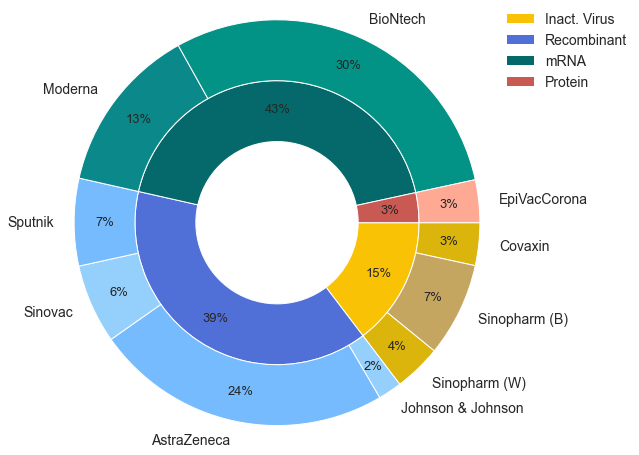

In [6]:
#Plot double donut for vaccines/vaccine types
#Set plot style
plt.style.use('seaborn-whitegrid')

#Define basic plot parameters
params = {'figure.figsize': (8, 8),
          'legend.fontsize': '14',
          'xtick.labelsize':'14',
          'font.size': 13}
plt.rcParams.update(params)

#Get data for inner and outer donut
data_inner = [df_filt_3.covaxin.sum() + df_filt_3.sinopharm_beijing.sum() + df_filt_3.sinopharm_wuhan.sum(),
              df_filt_3.johnson_johnson.sum() + df_filt_3.oxford_astrazeneca.sum() + df_filt_3.sinovac.sum() + df_filt_3.sputnik_v.sum(),
              df_filt_3.moderna.sum() + df_filt_3.pfizer_biontech.sum(),
              df_filt_3.epivaccorona.sum()]

data_outer = [df_filt_3.covaxin.sum(), df_filt_3.sinopharm_beijing.sum(), df_filt_3.sinopharm_wuhan.sum(),
              df_filt_3.johnson_johnson.sum(), df_filt_3.oxford_astrazeneca.sum(), df_filt_3.sinovac.sum(), df_filt_3.sputnik_v.sum(),
              df_filt_3.moderna.sum(), df_filt_3.pfizer_biontech.sum(),
              df_filt_3.epivaccorona.sum()]

#Plot inner and outer donut
plt.pie(data_inner,
        counterclock=False,
        startangle=-360,
        radius=0.7,
        colors=['xkcd:goldenrod', 'xkcd:cornflower blue', 'xkcd:dark aqua', 'xkcd:dark salmon'],
        labels=['Inact. Virus', 'Recombinant', 'mRNA', 'Protein'],
        autopct='%.0f%%',
        pctdistance=0.8,
        wedgeprops=dict(width=0.3, edgecolor='white'),
        labeldistance=None)

plt.legend(loc=(1, 0.8))

plt.pie(data_outer,
        counterclock=False,
        startangle=-360,
        radius=1,
        colors=['xkcd:gold', 'xkcd:sandy brown', 'xkcd:gold',
                'xkcd:light blue', 'xkcd:sky blue', 'xkcd:light blue', 'xkcd:sky blue',
                'xkcd:dark cyan', 'xkcd:teal', 
                'xkcd:light salmon'],
        labels=['Covaxin', 'Sinopharm (B)', 'Sinopharm (W)',
                'Johnson & Johnson', 'AstraZeneca', 'Sinovac', 'Sputnik',
                'Moderna', 'BioNtech',
                'EpiVacCorona'],
        autopct='%.0f%%',
        pctdistance=0.85,
        wedgeprops=dict(width=0.3, edgecolor='white'))


plt.axis('equal')
plt.show();

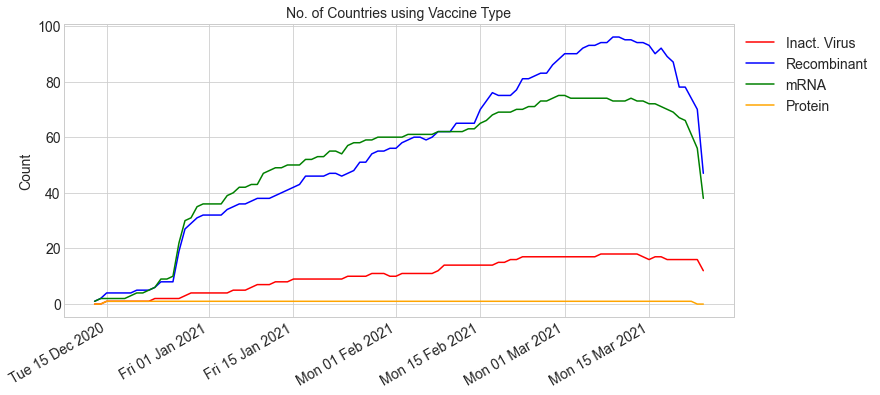

In [7]:
#Plot no. of countries using types of vaccines over time
#Set plot style
plt.style.use('seaborn-whitegrid')

#Define basic plot parameters
params = {'figure.figsize': (12, 6),
          'legend.title_fontsize': '14',
          'legend.fontsize': '14',
          'axes.labelsize': '14',
          'axes.titlesize':'14',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
plt.rcParams.update(params)

plt.xticks(rotation=70)
plt.title('No. of Countries using Vaccine Type')

#Filter dataframe and sum grouped by date
filtered = df_processed_date[['inactivated_virus', 'recombinant', 'rna', 'protein']].groupby('date').sum()

#Define seaborn lineplots
sns.lineplot(x='date', y='inactivated_virus', data=filtered, color='red', linewidth=1.5)
sns.lineplot(x='date', y='recombinant', data=filtered, color='blue', linewidth=1.5)
sns.lineplot(x='date', y='rna', data=filtered, color='green', linewidth=1.5)
sns.lineplot(x='date', y='protein', data=filtered, color='orange', linewidth=1.5).set(ylabel='Count', xlabel='')

#Define x-axis as date and set style
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%a %d %b %Y')
plt.gca().xaxis.set_major_formatter(date_format)

# Define plot legend
plt.legend(labels=['Inact. Virus', 'Recombinant', 'mRNA', 'Protein'], bbox_to_anchor = (1, 1))

plt.show();

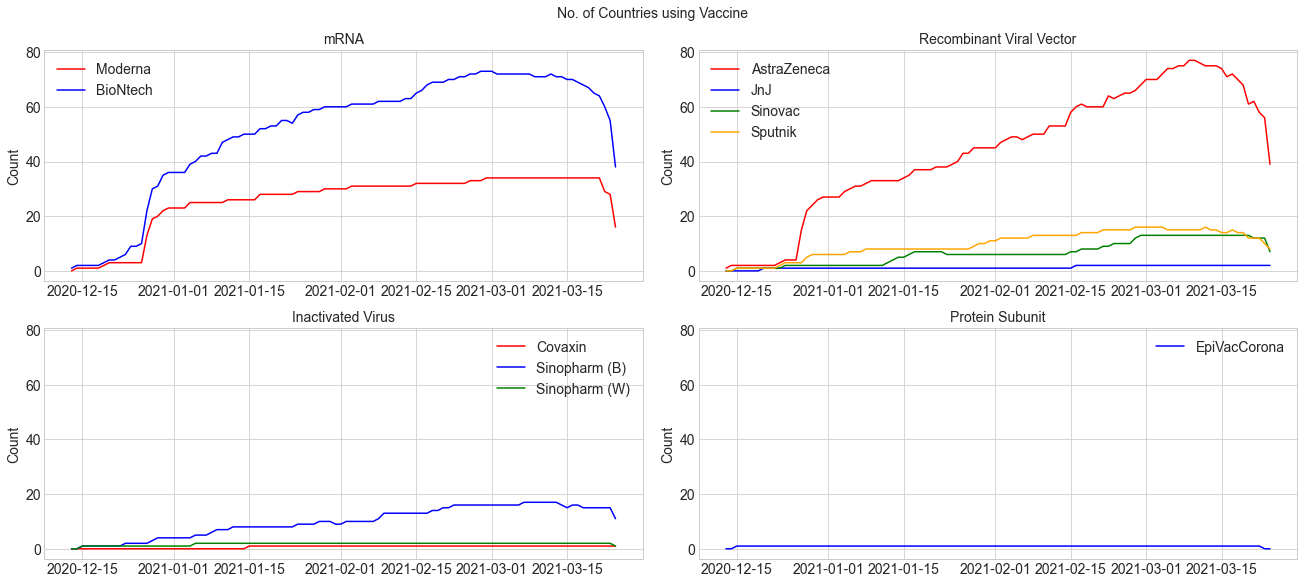

In [8]:
#Plot no. of countries using vaccines over time
#Define subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,8), constrained_layout=True)

#Set plot style
plt.style.use('seaborn-whitegrid')

#Define basic plot parameters
params = {'legend.title_fontsize': '14',
          'legend.fontsize': '14',
          'axes.labelsize': '14',
          'axes.titlesize':'14',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
plt.rcParams.update(params)

#Filter dataframe and sum grouped by date
filtered = df_processed_date[['covaxin', 'epivaccorona', 'johnson_johnson', 'moderna',
                               'oxford_astrazeneca', 'pfizer_biontech', 'sinopharm_beijing',
                               'sinopharm_wuhan', 'sinovac', 'sputnik_v']].groupby('date').sum()

#Define seaborn lineplots
sns.lineplot(x='date', y='moderna', data=filtered, color='red', linewidth=1.5, ax=ax[0,0], legend='brief', label='Moderna')
sns.lineplot(x='date', y='pfizer_biontech', data=filtered, color='blue', linewidth=1.5, ax=ax[0,0], legend='brief', label='BioNtech')

sns.lineplot(x='date', y='oxford_astrazeneca', data=filtered, color='red', linewidth=1.5, ax=ax[0,1], legend='brief', label='AstraZeneca')
sns.lineplot(x='date', y='johnson_johnson', data=filtered, color='blue', linewidth=1.5, ax=ax[0,1], legend='brief', label='JnJ')
sns.lineplot(x='date', y='sinovac', data=filtered, color='green', linewidth=1.5, ax=ax[0,1], legend='brief', label='Sinovac')
sns.lineplot(x='date', y='sputnik_v', data=filtered, color='orange', linewidth=1.5, ax=ax[0,1], legend='brief', label='Sputnik')

sns.lineplot(x='date', y='covaxin', data=filtered, color='red', linewidth=1.5, ax=ax[1,0], legend='brief', label='Covaxin')
sns.lineplot(x='date', y='sinopharm_beijing', data=filtered, color='blue', linewidth=1.5, ax=ax[1,0], legend='brief', label='Sinopharm (B)')
sns.lineplot(x='date', y='sinopharm_wuhan', data=filtered, color='green', linewidth=1.5, ax=ax[1,0], legend='brief', label='Sinopharm (W)')

sns.lineplot(x='date', y='epivaccorona', data=filtered, color='blue', linewidth=1.5, ax=ax[1,1], legend='brief', label='EpiVacCorona')

#Set title, axis labels and legends
fig.suptitle('No. of Countries using Vaccine', fontsize='14')
ax[0, 0].title.set_text('mRNA')
ax[0, 1].title.set_text('Recombinant Viral Vector')
ax[1, 0].title.set_text('Inactivated Virus')
ax[1, 1].title.set_text('Protein Subunit')
ax[0, 0].set_xlabel('')
ax[0, 1].set_xlabel('')
ax[1, 0].set_xlabel('')
ax[1, 1].set_xlabel('')
ax[1, 0].set_ylabel('Count')
ax[0, 0].set_ylabel('Count')
ax[0, 1].set_ylabel('Count')
ax[1, 1].set_ylabel('Count')

#Set y-axis to same scale for all subplots
plt.setp(ax, ylim=ax[0,1].get_ylim()) #Add to set y-axis to same scale

plt.show();

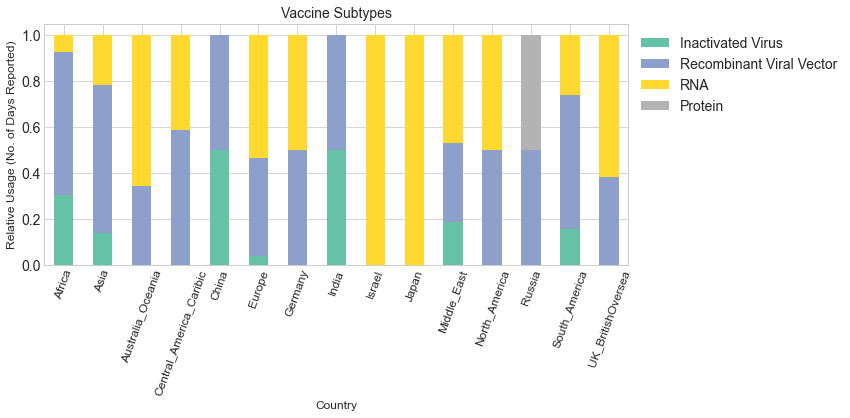

In [9]:
#Horizontal barchart for vaccine types
#Calculate values and plot barchart
df_filt_4 = df_filt_4.div(df_filt_4.sum(axis=1), axis=0)
df_filt_4.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

# Define plot legend etc.
plt.legend(labels=['Inactivated Virus', 'Recombinant Viral Vector', 'RNA', 'Protein'],
           bbox_to_anchor = (1, 1))

plt.title('Vaccine Subtypes', size='14')
plt.ylabel('Relative Usage (No. of Days Reported)', size='12')
plt.xticks(rotation=70, size='12')
plt.xlabel('Country', size='12')
plt.tight_layout()

plt.plot();

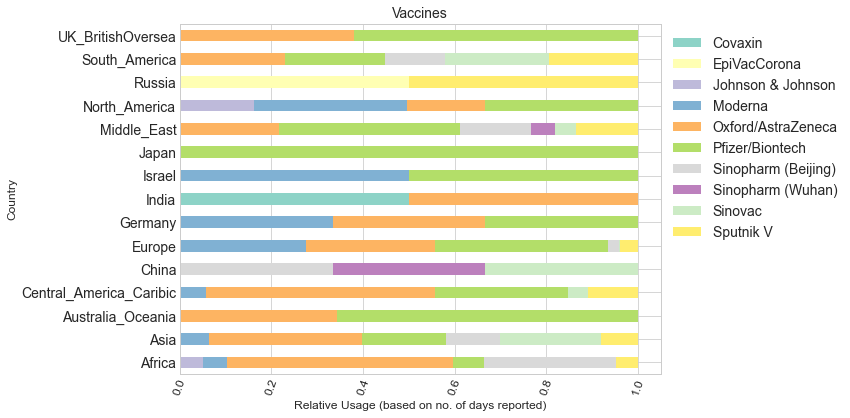

In [10]:
#Horizontal barchart for vaccines
#Calculate values and plot barchart
df_filt_3 = df_filt_3.div(df_filt_3.sum(axis=1), axis=0)
df_filt_3.plot.barh(stacked=True, figsize=(12, 6), colormap='Set3')

# Define plot legend etc.
plt.legend(labels=['Covaxin', 'EpiVacCorona', 'Johnson & Johnson', 'Moderna',
          'Oxford/AstraZeneca', 'Pfizer/Biontech', 'Sinopharm (Beijing)',
          'Sinopharm (Wuhan)', 'Sinovac', 'Sputnik V'],
           bbox_to_anchor = (1, 1))

plt.title('Vaccines', size='14')
plt.ylabel('Country', size='12')
plt.xticks(rotation=70, size='12')
plt.xlabel('Relative Usage (based on no. of days reported)', size='12')
plt.tight_layout()

plt.plot();

**TASK 2**:

Here we check out how individual countries are doing with regard to the number of people vaccinated, both in absolute numbers and in percentage of population.  As a person can be vaccinated in terms of one injection (partially vaccinated) or two injections (fully vaccinated, within 2-6 weeks post initial vaccination), it is also interesting to visualise the relative numer og people partially and fully vaccinated per country. This will give an insight into the vaccination strategy of each country.

NOTE: Since there is no data available regarding the age of the people vaccinated we cannnot investigate if different countries follow different strategies with respect to this. This would have been an interesting factor, since elderly people are generally more severly affected by the virus and many countries seem to start by inocculating the older generations first. Nonetheless, there may well be some countries who do not follow this strategy, unfortunately we won't be able to find out. 

**KEY FINDINGS**:

1) The first plot shows the vaccination status in Europe per country (mid-March 2021). It can clearly be seen that for the UK the percentage of the population that has received partial or full vaccination is highest (42%). This goes in line with what we would expect based on the media coverage. It is noteworthy that most countries have achieved a level of around 10% with respect to people vaccinated. Countries with the lowest level are Ukraine, Belarus and Russia. Hungary and Serbia have vaccinated around 20% of the population and are thus ahead of most other European countries, but still far behind the UK.

2) The second and third plots show the number of people vaccinated (% and total) for a selection of countries, also taking a look beyond Europe. Furthermore, we now take a look at the temporal development of the vaccination levels. It is noteworthy that Israel is way ahead of other countries with a level of people vaccinated that is around 60% to date. This is followed by the UK (around 40%) and the USA (around 25%). Germany has so far achieved 10%, and India and Russia below 5%. As an aside, there is no such data available for China and too few datapoints for the United Arab Emirates. In terms of total numbers rather than percentage of course the size of the country comes into play and things look different. From this perspective the USA have >80M people vaccinated, followed by India with >40M and the UK with >20M. Israel, Germany and Russia are below 10M people vaccinated. For all countries we observe a positive (near linear) trend over time. And, lastly the UK was the first country to start vaccinations back in December 2020, and India was the last country to initialise vaccinations in February 2021 (out of the selection of countries investigated in these plots).

3) The fourth and fifth plot show the differences for selected countries with respect to the numbers of partially versus fully vaccinated people. Israel has the highest percentage of fully vaccinated people with 50% of the population. Starting from late January 2021 the percentage of fully vaccinated people rose above the percentage of partially vaccinated people indicating that Israel goes with the common strategy of fully vaccinating the population. In contrast the UK has the highest number of partially vaccinated people with around 40% of the population demonstrating a vaccination strategy with respect to higher priority on partial vaccination to achive some degree of protection for the entire population as fast as possible. In line with this the UK has one of the lowest numbers with respect to full vaccination. Germany, the USA and India have numbers that are a lot lower in general. When we take a closer look we can see that India appears to adopt a similar strategy to the UK, but this may be an effect caused bby the fact that they have only started vaccinations in mid-february and the second injection usually only follows 4-6 weeks after the first. For Germany (and the USA - not depicted) partial and full vaccinations go more or less in-line with full vaccinations lagging behind partial vaccinations most of the time.

4) The sixth plot show the country with the highest proportion of the population fully vaccinated, i.e. Gibraltar (part of British Overseas). With over 70% of the population fully vaccinated this country has most likely achieved herd-immunity. The temporal patttern of partly versus fully vaccinated is similar to that observed for Israel reflecting the fact that the secons jab usually follows 4-6 weeks after the first injection.

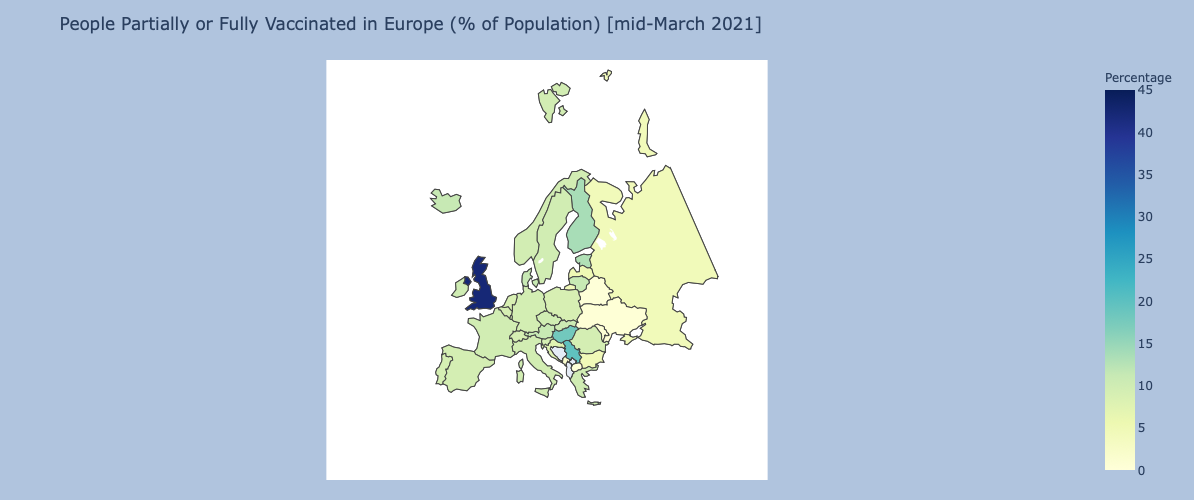

In [11]:
#Filter dataset to get last entry in March per country
filtered = df_date.loc['2021-03-01':'2021-03-24'].groupby('country').agg(
                                                                    {'people_vaccinated_per_hundred': 'max',
                                                                     'iso_code': 'max',
                                                                     'vaccines': 'max'}).reset_index()

#Create choropleth plot for total vaccinations in Europe (March 2021) based on iso country code
fig = px.choropleth(filtered, locations='iso_code',
                    color='people_vaccinated_per_hundred',
                    range_color=(0, 45), #Set range of data, i.e. in this case 45%, as max for UK
                    scope='europe', #Select region (world, europe, asia, usa)
                    hover_name='country', #Set country hover label
                    hover_data={'iso_code': False, 'vaccines': True}, #Set vaccines hover data
                    color_continuous_scale='YlGnBu',
                    width=800, height=500)

# Set title and define plot
fig.update_layout(title_text='People Partially or Fully Vaccinated in Europe (% of Population) [mid-March 2021]',
                  paper_bgcolor='LightSteelBlue',
                  margin={'r':20,'t':60,'l':20,'b':20},
                  coloraxis_colorbar=dict(title='Percentage'))

fig.show();

![](images/nb5_fig1.png)

In [12]:
#No datapoints for China on people vaccinated
check_china_1 = df_processed[df_processed.country.isin(['China'])].shape[0]
check_china_2 = df_processed[df_processed.country.isin(['China'])].people_vaccinated.isnull().sum()
print(f'SPOTCHECK: The are {check_china_2} empty rows for the column people_vaccinated for China out of a total of {check_china_1} observations for China.')

SPOTCHECK: The are 99 empty rows for the column people_vaccinated for China out of a total of 99 observations for China.


In [13]:
#Too few datapoints for China on people vaccinated
check_UAE_1 = df_processed[df_processed.country.isin(['United Arab Emirates'])].shape[0]
check_UAE_2 = df_processed[df_processed.country.isin(['United Arab Emirates'])].people_vaccinated.isnull().sum()
print(f'SPOTCHECK: The are {check_UAE_2} empty rows for the column people_vaccinated for United Arab Emirates out of a total of {check_UAE_1} observations for UAE.')

SPOTCHECK: The are 77 empty rows for the column people_vaccinated for United Arab Emirates out of a total of 79 observations for UAE.


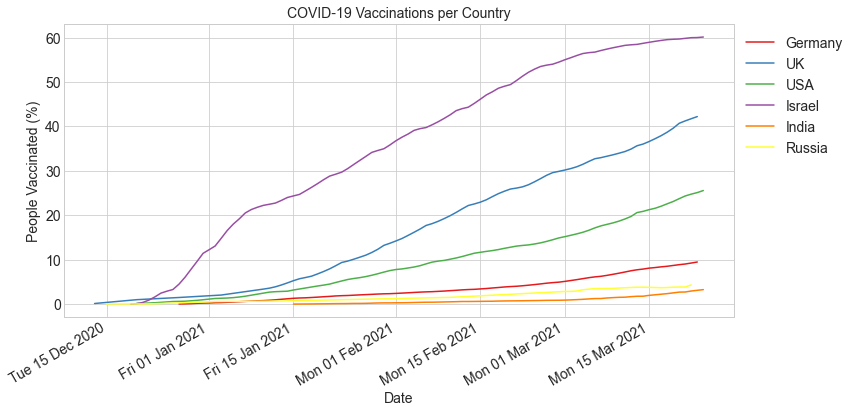

In [14]:
#Plot people vaccinated (%) per country over time
#Set plot style
plt.style.use('seaborn-whitegrid')

#Define basic plot parameters
params = {'figure.figsize': (12, 6),
          'legend.title_fontsize': '14',
          'legend.fontsize': '14',
          'axes.labelsize': '14',
          'axes.titlesize':'14',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
plt.rcParams.update(params)

plt.xticks(rotation=70)
plt.ticklabel_format(style='plain')
plt.title('COVID-19 Vaccinations per Country')

#Selection of countries to plot
c_lst = ['Germany', 'United Kingdom', 'United States', 'Israel', 'India', 'Russia']  #Change selection if desired

#Filter dataframe based on country list
filtered = df_processed[df_processed['country'].isin(c_lst)]

#Define variables to be plotted
data = filtered
x = 'date'
y = 'people_vaccinated_per_hundred' #Change to alternative feature if desired
hue = 'country'

#Seaborn lineplot
sns.lineplot(x=x, y=y, hue=hue, data=data,
             palette='Set1',
             linewidth=1.5,
             linestyle=None,
             hue_order=c_lst,
             ci=None
).set(
       ylabel='People Vaccinated (%)',
       xlabel='Date',
)

#Define x-axis as date and set style
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%a %d %b %Y')
plt.gca().xaxis.set_major_formatter(date_format)

# Define plot legend
plt.legend(labels=['Germany', 'UK', 'USA', 'Israel', 'India', 'Russia'], bbox_to_anchor = (1, 1))

plt.show();

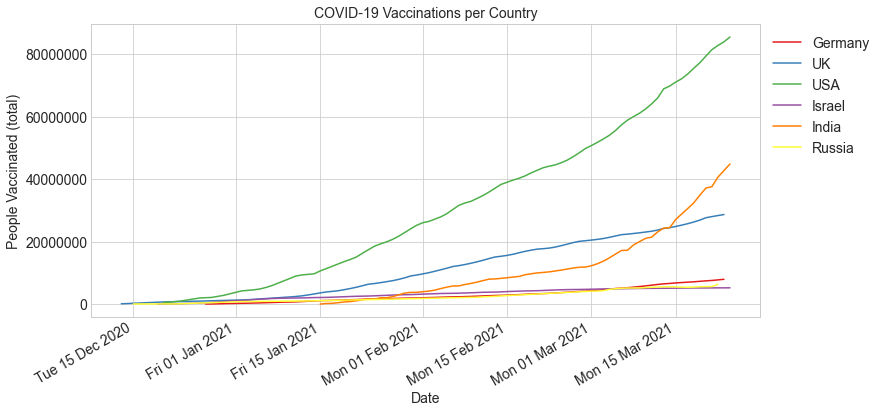

In [15]:
#Plot people vaccinated (total) per country over time
#Set plot style
plt.style.use('seaborn-whitegrid')

#Define basic plot parameters
params = {'figure.figsize': (12, 6),
          'legend.title_fontsize': '14',
          'legend.fontsize': '14',
          'axes.labelsize': '14',
          'axes.titlesize':'14',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
plt.rcParams.update(params)

plt.xticks(rotation=70)
plt.ticklabel_format(style='plain')
plt.title('COVID-19 Vaccinations per Country')

#Selection of countries to plot
c_lst = ['Germany', 'United Kingdom', 'United States', 'Israel', 'India', 'Russia']  #Change selection if desired

#Filter dataframe based on country list
filtered = df_processed[df_processed['country'].isin(c_lst)]

#Define variables to be plotted
data = filtered
x = 'date'
y = 'people_vaccinated' #Change to alternative feature if desired
hue = 'country'

#Seaborn lineplot
sns.lineplot(x=x, y=y, hue=hue, data=data,
             palette='Set1',
             linewidth=1.5,
             linestyle=None,
             hue_order=c_lst,
             ci=None
).set(
       ylabel='People Vaccinated (total)',
       xlabel='Date',
)

#Define x-axis as date and set style
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%a %d %b %Y')
plt.gca().xaxis.set_major_formatter(date_format)

# Define plot legend
plt.legend(labels=['Germany', 'UK', 'USA', 'Israel', 'India', 'Russia'], bbox_to_anchor = (1, 1))

plt.show();

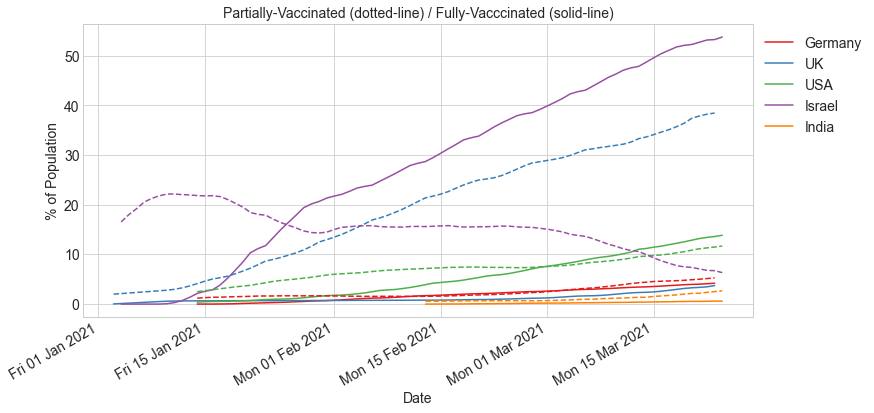

In [16]:
#Plot people vaccinated (partially and fully) per country over time
#Set plot style
plt.style.use('seaborn-whitegrid')

#Define basic plot parameters
params = {'figure.figsize': (12, 6),
          'legend.title_fontsize': '14',
          'legend.fontsize': '14',
          'axes.labelsize': '14',
          'axes.titlesize':'14',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
plt.rcParams.update(params)

plt.xticks(rotation=70)
plt.ticklabel_format(style='plain')
plt.title('Partially-Vaccinated (dotted-line) / Fully-Vacccinated (solid-line)')

#Selection of countries to plot
c_lst = ['Germany', 'United Kingdom', 'United States', 'Israel', 'India']   #Change selection if desired (e.g. add Russia, Gibraltar)

#Filter dataframe based on country list
filtered = df_processed[df_processed['country'].isin(c_lst)]

#Define variables to be plotted
data = filtered
x = 'date'
y1 = 'people_fully_vaccinated_per_hundred'  #Change to alternative feature if desired
y2 = 'people_partially_vaccinated_per_hundred'  #Change to alternative feature if desired

#Seaborn lineplots
sns.lineplot(x=x, y=y1, hue=hue, data=data,
             palette='Set1',
             linewidth=1.5,
             linestyle=None,
             hue_order=c_lst,
             ci=None
)
sns.lineplot(x=x, y=y2, hue=hue, data=data,
             palette='Set1',
             linewidth=1.5,
             linestyle='--',
             hue_order=c_lst,
             ci=None
).set(
       ylabel='% of Population',
       xlabel='Date',
)

#Define x-axis as date and set style
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%a %d %b %Y')
plt.gca().xaxis.set_major_formatter(date_format)

# Define plot legend
plt.legend(labels=['Germany', 'UK', 'USA', 'Israel', 'India'], bbox_to_anchor = (1, 1))

plt.show();

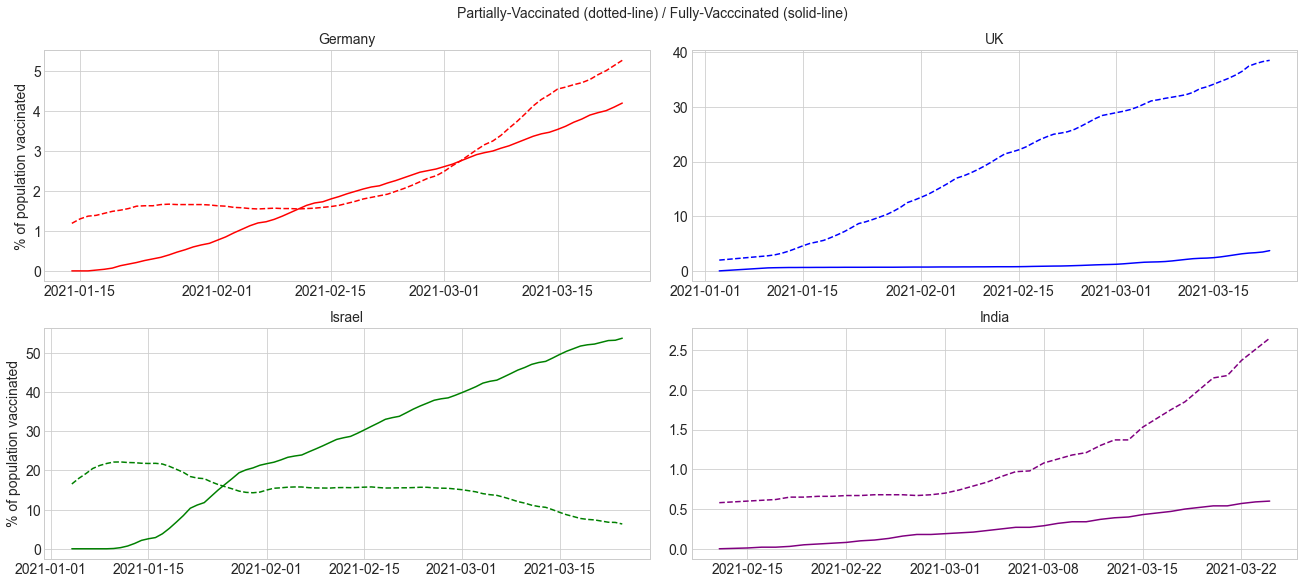

In [17]:
#Plot people vaccinated (fully and partially) per country over time
#Define subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,8), constrained_layout=True)

#Set plot style
plt.style.use('seaborn-whitegrid')

#Define basic plot parameters
params = {'legend.title_fontsize': '14',
          'legend.fontsize': '14',
          'axes.labelsize': '14',
          'axes.titlesize':'14',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
plt.rcParams.update(params)

#Filter dataframe based on country
filtered_1 = df_processed[df_processed['country'].isin(['Germany'])]
filtered_2 = df_processed[df_processed['country'].isin(['United Kingdom'])]
filtered_3 = df_processed[df_processed['country'].isin(['Israel'])]
filtered_4 = df_processed[df_processed['country'].isin(['India'])]

#Define variables to be plotted
x = 'date'
y1 = 'people_partially_vaccinated_per_hundred'  #Change to alternative feature if desired
y2 = 'people_fully_vaccinated_per_hundred'  #Change to alternative feature if desired

#Seaborn lineplot No.1
sns.lineplot(x=x, y=y1, data=filtered_1, color='red', linewidth=1.5, linestyle='--', ci=None, ax=ax[0,0], legend=False)
sns.lineplot(x=x, y=y2, data=filtered_1, color='red', linewidth=1.5, linestyle=None, ci=None, ax=ax[0,0], legend=False)

#Seaborn lineplot No.2
sns.lineplot(x=x, y=y1, data=filtered_2, color='blue', linewidth=1.5, linestyle='--', ci=None, ax=ax[0,1], legend=False)
sns.lineplot(x=x, y=y2, data=filtered_2, color='blue', linewidth=1.5, linestyle=None, ci=None, ax=ax[0,1], legend=False)

#Seaborn lineplot No.3
sns.lineplot(x=x, y=y1, data=filtered_3, color='green', linewidth=1.5, linestyle='--', ci=None, ax=ax[1,0], legend=False)
sns.lineplot(x=x, y=y2, data=filtered_3, color='green', linewidth=1.5, linestyle=None, ci=None, ax=ax[1,0], legend=False)

#Seaborn lineplot No.4
sns.lineplot(x=x, y=y1, data=filtered_4, color='purple', linewidth=1.5, linestyle='--', ci=None, ax=ax[1,1], legend=False)
sns.lineplot(x=x, y=y2, data=filtered_4, color='purple', linewidth=1.5, linestyle=None, ci=None, ax=ax[1,1], legend=False)

#Set title, axis labels and legends
fig.suptitle('Partially-Vaccinated (dotted-line) / Fully-Vacccinated (solid-line)', fontsize='14')
ax[0, 0].title.set_text('Germany')
ax[0, 1].title.set_text('UK')
ax[1, 0].title.set_text('Israel')
ax[1, 1].title.set_text('India')
ax[0, 0].set_xlabel('')
ax[0, 1].set_xlabel('')
ax[1, 0].set_xlabel('')
ax[1, 1].set_xlabel('')
ax[0, 0].set_ylabel('% of population vaccinated')
ax[0, 1].set_ylabel('')
ax[1, 0].set_ylabel('% of population vaccinated')
ax[1, 1].set_ylabel('')

#Set y-axis to same scale for all subplots
#plt.setp(ax, xlim=ax[0,0].get_xlim()) #Add to set x-axis to same scale
#plt.setp(ax, ylim=ax[1,1].get_ylim()) #Add to set y-axis to same scale

plt.show();

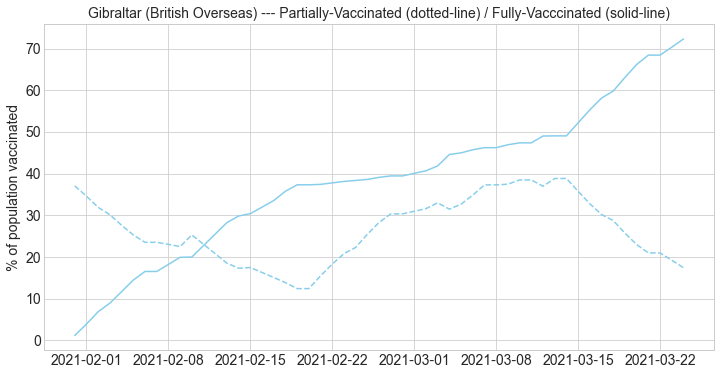

In [18]:
#Plot people vaccinated (fully and partially) for Gibraltar (part of British Overseas)
#Set plot style
plt.style.use('seaborn-whitegrid')

#Define basic plot parameters
params = {'legend.title_fontsize': '14',
          'legend.fontsize': '14',
          'axes.labelsize': '14',
          'axes.titlesize':'14',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
plt.rcParams.update(params)

#Filter dataframe based on country
filtered_1 = df_processed[df_processed['country'].isin(['Gibraltar'])]

#Define variables to be plotted
x = 'date'
y1 = 'people_partially_vaccinated_per_hundred'  #Change to alternative feature if desired
y2 = 'people_fully_vaccinated_per_hundred'  #Change to alternative feature if desired

#Seaborn lineplot
fig1 = sns.lineplot(x=x, y=y1, data=filtered_1, color='skyblue', linewidth=1.5, linestyle='--', ci=None, legend=False)
fig2 = sns.lineplot(x=x, y=y2, data=filtered_1, color='skyblue', linewidth=1.5, linestyle=None, ci=None, legend=False)

#Set title, axis labels and legends
fig1.title.set_text('Gibraltar (British Overseas) --- Partially-Vaccinated (dotted-line) / Fully-Vacccinated (solid-line)')
fig1.set_xlabel('')
fig1.set_ylabel('% of population vaccinated')

plt.show();

**TASK 3**:

To further investigate the daily vaccinations, both with respect to variations over time and with respect to potential differences between the daily vaccinations and the daily vaccinations (raw) feature.

**KEY FINDINGS**:

1) A quick check of the total daily vaccinations globally per month shows a discrepancy between daily vaccinations and daily vaccinations (raw). This discrepany is around 5% for March 2021, but a lot higher for December 2020 when vacciantions had just startet. Research into the datasource has let to the following insight:
+ Daily vaccinations (raw) is calculated from total vaccinations (for cases where data day-1 is available) for cross check purposes.
+ This is necessary for cross-checking purposes as missing values in the daily vaccination column were imputed using the following technique: 7-day rolling window (For details see [OWID Github](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations) and [OWID Github](https://github.com/owid/covid-19-data/issues/333)). Due to this there are basically no missing values in the daily vaccination column (apart from day(s) just before vaccintion startet in a specific country, when the vaccine(s) were available and entered as an observation, but vaccination had not startet.


2) The first lineplot shows very nicely the pattern (orange line) in the daily vaccinations, which one might suspect to be a weekly pattern. It also demonstrates how well the imputation by 7-day smoothing works (blue line). And, it shows how the 7-day smoothed values are in line with the upper values observed for daily vaccinations, explaining the discrepancies between daily vaccinations and daily vaccinations (raw) with the imputed values usually overestimating the raw values (lineplot 2). The dip towards the end of the time-span for which the data is available could be real, or due to a time-delay in data being reported for some countries (requires further investigation).

3) The boxplots show the distribution of daily vaccinations per day of the week. Due to the large spread of the data per day with many outliers, caused by the large population and vaccination differences between countries, the global data is plotted as log sclale. The suspected variations in the weekly pattern of daily vaccinations is confirmed with lowest median on Sunday and highest on Thursdays from a global perspective. Looking further into individual countries we notice different weekly patttern for individual countries. This can e.g. be attributed to whether or not a country vaccinates on weekends.

In [19]:
#Sums of vaccinations (daily and total) per month - NOTE discrepancy between daily and daily (raw)
#Resample by 'M' to show variations on a monthly basis
check_dv = df_processed_date[['daily_vaccinations_raw', 'daily_vaccinations']].resample('W-MON').sum()

#Add columns reflexting difference between daily and daily (raw) vaccination columns (total and percent)
check_dv['difference'] = abs(check_dv['daily_vaccinations'] - check_dv['daily_vaccinations_raw'])
check_dv['difference_percent'] = round(check_dv['difference'] / (check_dv['daily_vaccinations'] + check_dv['daily_vaccinations_raw']) * 100, 0)

#Display results
print(f'CHECK: The discrepancies between global daily vaccinations and daily vaccinations (raw) on a weekly basis are: \n')
check_dv

CHECK: The discrepancies between global daily vaccinations and daily vaccinations (raw) on a weekly basis are: 



daily_vaccinations_raw  daily_vaccinations  difference  \
date                                                                 
2020-12-14                     0.0             84117.0     84117.0   
2020-12-21                110895.0           1824884.0   1713989.0   
2020-12-28                590230.0           3721097.0   3130867.0   
2021-01-04               1729245.0           6300202.0   4570957.0   
2021-01-11               5373921.0          10810806.0   5436885.0   
2021-01-18              11466227.0          17096255.0   5630028.0   
2021-01-25              18113118.0          24482272.0   6369154.0   
2021-02-01              23160032.0          29857903.0   6697871.0   
2021-02-08              25121148.0          36833523.0  11712375.0   
2021-02-15              27755883.0          38966715.0  11210832.0   
2021-02-22              29538553.0          38811945.0   9273392.0   
2021-03-01              34270437.0          39949638.0   5679201.0   
2021-03-08              45041408.0          50980731.0   5939323.0   
2021-03-15              53177882.0          60108839.0   6930957.0   
2021-03-22              61826721.0          72755333.0  10928612.0   
2021-03-29              20062987.0          18785017.0   1277970.0   

            difference_percent  
date                            
2020-12-14               100.0  
2020-12-21                89.0  
2020-12-28                73.0  
2021-01-04                57.0  
2021-01-11                34.0  
2021-01-18                20.0  
2021-01-25                15.0  
2021-02-01                13.0  
2021-02-08                19.0  
2021-02-15                17.0  
2021-02-22                14.0  
2021-03-01                 8.0  
2021-03-08                 6.0  
2021-03-15                 6.0  
2021-03-22                 8.0  
2021-03-29                 3.0

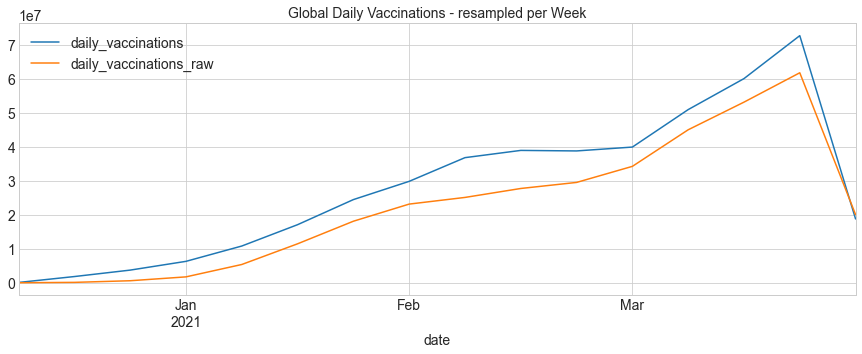

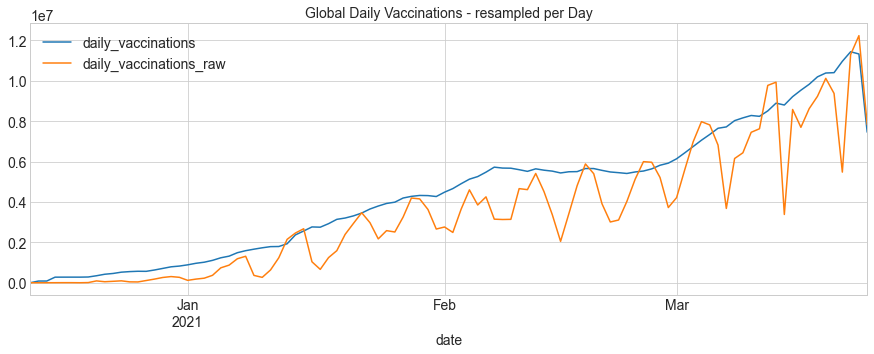

In [20]:
#Lineplot of sum of global daily vaccinations resampled by week
df_processed_date[['daily_vaccinations', 'daily_vaccinations_raw']].resample('W-MON').sum().plot(kind='line', figsize=(15,5))
plt.title('Global Daily Vaccinations - resampled per Week')
plt.show()

#Lineplot of median of global daily vaccinations resampled by day
df_processed_date[['daily_vaccinations', 'daily_vaccinations_raw']].resample('D').sum().plot(kind='line', figsize=(15,5))
plt.title('Global Daily Vaccinations - resampled per Day')
plt.show();

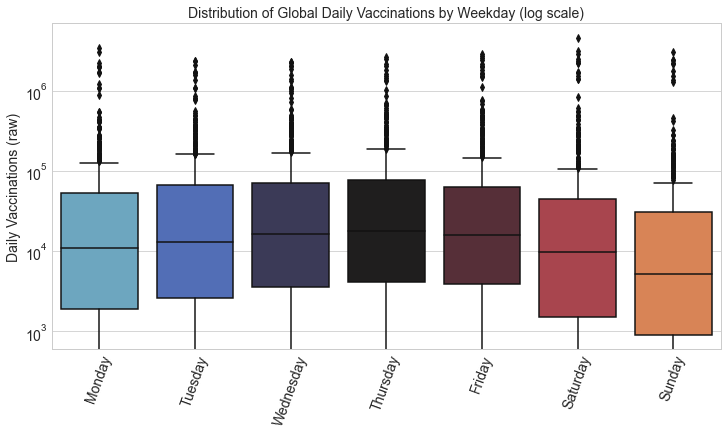

In [21]:
#Distribution of no. of daily vaccinations (raw) per weekday (log scale)
#Set plot title
plt.title('Distribution of Global Daily Vaccinations by Weekday (log scale)')

#Define variables to be plotted
x = 'weekday'
y = 'daily_vaccinations_raw'

#Seaborn boxplot
fig = sns.boxplot(x=x, y=y, data=df_processed, palette='icefire')

plt.xticks(rotation=70)
plt.yscale('log') #log scale required as to many outliers with exceptionally high numbers

#Set axis labels
fig.set_xlabel('')
fig.set_ylabel('Daily Vaccinations (raw)')

plt.show();

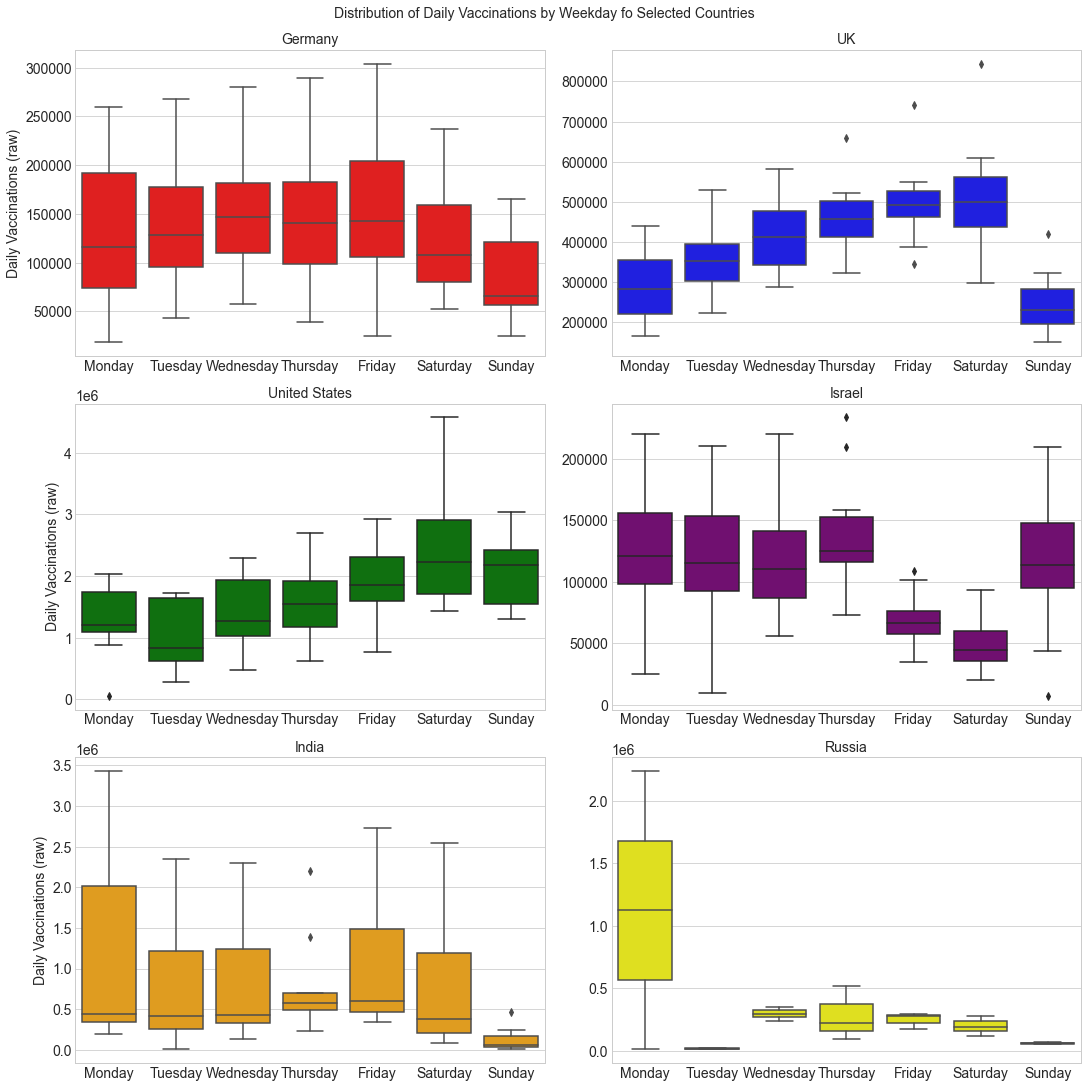

In [22]:
#Distribution of no. of daily vaccinations (raw) per weekday for selected countries
#Define subplots
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,15), constrained_layout=True)

#Set plot style
plt.style.use('seaborn-whitegrid')

#Define basic plot parameters
params = {'legend.title_fontsize': '14',
          'legend.fontsize': '14',
          'axes.labelsize': '14',
          'axes.titlesize':'14',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
plt.rcParams.update(params)

#Filter dataframe based on country
filtered_1 = df_processed[df_processed['country'].isin(['Germany'])]
filtered_2 = df_processed[df_processed['country'].isin(['United Kingdom'])]
filtered_3 = df_processed[df_processed['country'].isin(['United States'])]
filtered_4 = df_processed[df_processed['country'].isin(['Israel'])]
filtered_5 = df_processed[df_processed['country'].isin(['India'])]
filtered_6 = df_processed[df_processed['country'].isin(['Russia'])]

#Define variables to be plotted
x = 'weekday'
y = 'daily_vaccinations_raw'
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#Seaborn lineplots
sns.boxplot(x=x, y=y, data=filtered_1, color='red', order=order, ax=ax[0,0])
sns.boxplot(x=x, y=y, data=filtered_2, color='blue', order=order, ax=ax[0,1])
sns.boxplot(x=x, y=y, data=filtered_3, color='green', order=order, ax=ax[1,0])
sns.boxplot(x=x, y=y, data=filtered_4, color='purple', order=order, ax=ax[1,1])
sns.boxplot(x=x, y=y, data=filtered_5, color='orange', order=order, ax=ax[2,0])
sns.boxplot(x=x, y=y, data=filtered_6, color='yellow', order=order, ax=ax[2,1])

#Set title and axis labels
fig.suptitle('Distribution of Daily Vaccinations by Weekday fo Selected Countries', fontsize='14')
ax[0, 0].title.set_text('Germany')
ax[0, 1].title.set_text('UK')
ax[1, 0].title.set_text('United States')
ax[1, 1].title.set_text('Israel')
ax[2, 0].title.set_text('India')
ax[2, 1].title.set_text('Russia')
ax[0, 0].set_xlabel('')
ax[0, 1].set_xlabel('')
ax[1, 0].set_xlabel('')
ax[1, 1].set_xlabel('')
ax[2, 0].set_xlabel('')
ax[2, 1].set_xlabel('')
ax[0, 0].set_ylabel('Daily Vaccinations (raw)')
ax[0, 1].set_ylabel('')
ax[1, 0].set_ylabel('Daily Vaccinations (raw)')
ax[1, 1].set_ylabel('')
ax[2, 0].set_ylabel('Daily Vaccinations (raw)')
ax[2, 1].set_ylabel('')

plt.show();

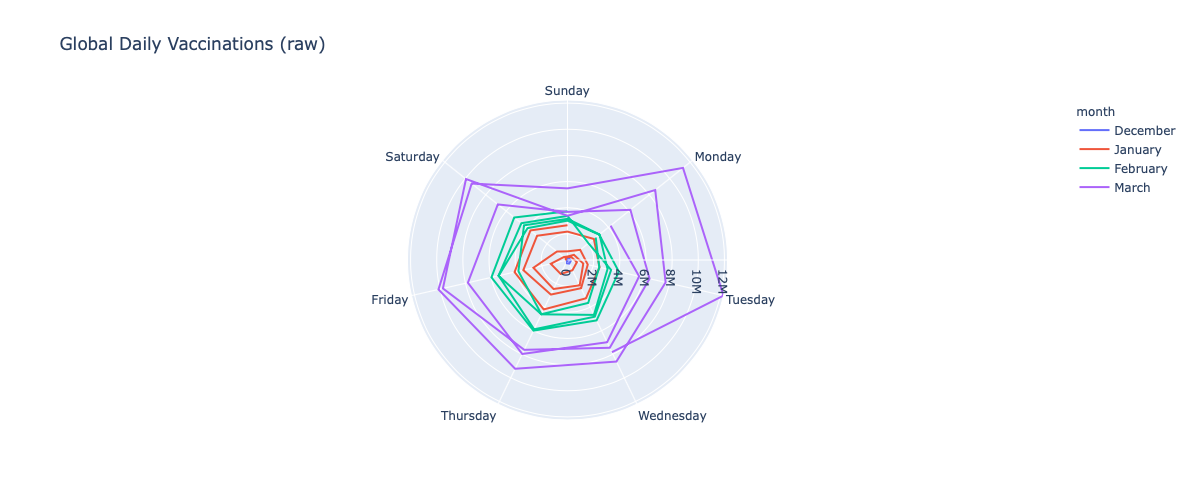

In [23]:
#Show positive trend of daily vaccinations from DEC to MAR
#Generate new dataframe (including month) agggregated by date
df_pp = df_processed[['date', 'daily_vaccinations_raw', 'weekday']].groupby('date').agg({'daily_vaccinations_raw': 'sum', 'weekday': 'max'})
df_pp = df_pp.reset_index()
df_pp['month'] = df_pp.date.dt.month_name()
df_pp.set_index('date')

#Polar plot for daily vaccinations (globally)
fig = px.line_polar(df_pp, r='daily_vaccinations_raw', theta='weekday',
                    color='month', line_close=False, 
                    title='Global Daily Vaccinations (raw)',
                    width=600, height=500)

fig.show();

![](images/nb5_fig2.png)

***
***

## 3. SUMMARY

***

### 3.1 Key Findings

1) The 4 recombinant viral vector based vaccines and the 2 messenger RNA based vaccines are most frequently used with BioNtech (mRNA) and AstraZeneca (recombinant) vaccines having the highest frequency.
+ Israel: Moderna and BioNtech (mRNA based vaccines)
+ India: AstraZeneca (recombinant) and Covaxin (inactivated virus)
+ Japan: BioNtech (mRNA)
+ Russia: Sputnik V (inactivated virus) and EpiVacCorona (protein)
+ China: Sinopharm (x 2) (inactivated virus) and Sinovac (recombinant)
    
    
    
2) Israel and Gibraltar have the highest number of fully vaccinated people (about 70% and 50%), whereas UK has the highest number of partially vaccinated people with around 40% of the population demonstrating different types of strategies. The vaccination progress per country (for selected countries) with respect to people vaccinated (partially and fully) is as follows as of 24th March 2021:
+ % Population vaccinated:
    + Israel (about 60%)
    + UK (about 40%)
    + USA (about 25%)
    + Hungary, Serbia (about 20%)
    + Germany (about 10%)
    + India, Russia, Ukraine (below 5%)
+ Population vaccinated (total):
    + USA: >80 million
    + India: >40 million
    + UK: >20 million
    + Israel, Germany, Russia:  <10 million
        
        
        
3) With respect to the 2 daily vaccination columns we noted the following:
+ There are no missing values for daily vaccinations as these are imputed by a 7-day rolling window/ smoothing technique, which causes the numbers to be slightly overestimated (as compared to daily vaccinations raw).
+ We observed a weekly pattern for daily vaccinations (raw) with Thursday being the strongest day for vaccinations, and Sunday the weakest, from a global perspective. Looking into different countries specifically this weekly pattern appears to differ. This is something we will look into further in one of the following notebooks.

***